In [6]:
# !pip install googlemaps
# !pip install gmplot

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# import googlemaps
# import gmplot
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

# 00. Load the Dataset

In [2]:
dataset = pd.read_csv("../dataset.csv")
dataset.head(10)

,id,name,address,governate,area,lat,lng,services
0,a2ecf0ba-d4c5-46ab-b013-1090b84d6d98,Abu Al Matamir,Alexandria St. in front of Abo Almatamir Youth...,Al-Behera,Abu Al Matamir,30.912211,30.170589,Withdrawal
1,ccc384e5-1685-4e11-8714-0ebb44713258,Abu Al Matamir,Mohamed Metwally Alshaarawy St. - Abo Almatamir,Al-Behera,Abu Al Matamir,30.910789,30.177019,Withdrawal -Deposit – Forex
2,dd5110e3-dec0-478b-8749-f7f63515d1b3,Abu Al Matamir,The Village of Ten Thousand - Abu Almatamir,Al-Behera,Abu Al Matamir,30.814059,29.988302,Withdrawal -Deposit – Forex
3,f4cce849-681b-4404-9feb-e54bb1cfe134,Abu Al Matamir,Abo Almatamir - Beheira,Al-Behera,Abu Al Matamir,30.915840,30.176447,Withdrawal
4,dc9b6f97-4044-4e0d-970c-2404b5f847dc,Higher Institute of Administrative Scie. Janaklis,Abo Almatamir - Albuhiera,Al-Behera,Abu Al Matamir,30.860114,30.154931,سحب فقط\n
5,e28fec03-c68d-44f5-9504-3a50bea39697,Etsalat - Almostaqbal Franchiez -Abo Almatamir,Abo Almatamir Alhaiar Bridge,Al-Behera,Abu Al Matamir,30.906353,30.173687,سحب فقط\n
6,52b01e68-47a2-4c8d-9d99-115b042a55b5,Etsalat Albehera,Abo Almatamir Almarkaz St.,Al-Behera,Abu Al Matamir,30.911589,30.177179,سحب فقط\n
7,7948b63e-518c-4f8c-b56e-4023246d47ad,Abo Almatamir Health Administration,Alexandria St. in front of Abo Almatamir Youth...,Al-Behera,Abu Al Matamir,30.912211,30.170589,Cash Dispenser only\n
8,c707718c-1080-45c3-95f0-c16897bf151f,Abu Almatamir Central Hospital,Abo Almatamir - Beheira,Al-Behera,Abu Al Matamir,30.915840,30.176447,Cash Dispenser only\n
9,035f3bfe-ad27-4300-8319-22305c065bbc,Tamwely Abu El Matamir,"General Secondary St. Abu El Matamir Center, n...",Al-Behera,Abu Al Matamir,30.912904,30.176892,"withdrawal,deposit"


In [3]:
df = dataset.copy()

# 01: Check Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4379 non-null   object 
 1   name       4370 non-null   object 
 2   address    4367 non-null   object 
 3   governate  4379 non-null   object 
 4   area       4379 non-null   object 
 5   lat        4379 non-null   float64
 6   lng        4379 non-null   float64
 7   services   4322 non-null   object 
dtypes: float64(2), object(6)
memory usage: 273.8+ KB


In [4]:
grouped_by_gov = df.groupby(['governate']).count()['area'].reset_index().sort_values(by='area',ascending=False)
grouped_by_gov

,governate,area
11,Cairo,1080
14,Giza,538
7,Alexandria,342
12,Dakahlia,252
5,Al-Sharkia,191
0,Al-Behera,167
21,Qalioubia,156
24,Sohag,156
4,Al-Monoufia,152
23,Red Sea,144


In [5]:
grouped_by_area = df.groupby(['area']).count()['id'].reset_index().sort_values(by='id',ascending=False)
grouped_by_area

,area,id
264,Nasr City,171
2,6th of October City,106
267,New Cairo,104
212,Hurghada,98
214,Ismailia,81
...,...,...
296,Sedy Abd Alrahmn,1
33,Al Farfarah,1
111,Bani Suef elgadida,1
27,Akhtab,1


# 02. Handling missing values and Nulls

In [6]:
miss_values = {
    'withdraw':1,
    'withdraw only ':1,
    'Withdraw ':1,
    'Withdraw': 1,
    'Cash Dispenser only\r\n\r\n':1,
    'Cash Dispenser only':1,
    'Cash Dispenser only\n\n': 1,
    'withdrawal ':1,
    'cash withdrawal':1,
    'cash withdraw': 1,
    'سحب فقط':1,
    'withdrawal':1,
    'withdraw only':1,
    'سحب فقط ':1,
    'Withdrawal only' : 1,
    'with drawal': 1,
    'Withdrawal': 1,
    'سحب ':1,
    'سحب': 1,
    'Withdrawal Only': 1,
    'withdrawal only': 1,
    'سحب فقط\r\n':1,
    'سحب فقط\n':1,
    'withdrawal only ':1,
    'Cash Dispenser only\r\n':1,
    'Withdrawl only':1,
    'withdrawl only':1,
    'deposit , withdrawal':2,
    'with drawal deposit':2,
    'deposit,withdrawal':2,
    'withdrawal.deposit':2,
    'withdrawal and deposit':2,
    'withdrawal, deposit':2,
    'سحب وايداع ':2,
    'deposit':2,
    'Cash Dispenser only\n': 2,
    'WIth drawal , deposit':2,
    'Withdrawal and Deposit':2,
    'withdrawal,depsoit':2,
    'withdrawal ,deposit':2,
    'withdrawal , deposit':2,
    'with drawal , deposit':2,
    'withdrawal deposit':2,
    'withdrawal . deposit':2,
    'deposits,withdrawal':2,
    'Withdrawal and Deposit ':2,
    'deposit and withdrawal':2,
    'withdrawal,deposit':2,
    'withdrawal,deposit ':2,
    'depositand withdrawal':2,
    'سحب وايداع': 2,
    '25.142973,34.840527\n\n': 2,
    'deposit withdrawal':2,
    'withdrawal forex deposit':3,
    'withdrawal,deposit,forex':3,
    'withdrawal,forex,deposit':3,
    'withdrawal deposit forex':3,
    'with drawal deposit forex':3,
    'withdrawal forex deposit ':3,
    'withdrawal , forex , deposit':3,
    'Withdrawal -Deposit – Forex':3,
    'Withdrawal, Deposit, Exchange':3,
    'سحب وايداع وتغيير عملة':3,
    'سحب - إيداع - تغيير عملة\n': 3,
    'Withdrawal, deposit and exchange':3,
    'Withdraw - Deposit - Currency Exchange ':3,
    'GBRU سحب - إيداع - تغيير عملة - صرف من الإيداعات\r\n':3,
    'Withdrawal -Deposit - Forex':3,
    'سحب - إيداع - تغيير عملة\r\n':3,
    'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU\r\n':3,
    'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU\n':3,
    'deposit,withdraw and exchange':3,
    'Withdrawal, Deposit and Exchange':3,
    'withdrawal , forex , deposits':3,
    'with drawal,cash ,forex':3,
    'withdrawal, deposit, forex':3,
    'withdrawal, deposit and exchange':3,
    'Exchange':3,
    'Exchange ':3,
    'withdrawal,forex deposit':3,
    'withdrawal, deposit and exchange\r\n':3,
    'Withdraw - Deposit - Change currency':3,
    'Withdrawal - deposit - currency exchange':3,
    'deposit, withdraw and exchange\t\t\t\t\r\n\t\t\t\t\r\n':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n\t\t\t':3,
    'withdrawal.deposit,forex':3,
    'withdrawal , deposit, forex':3,
    'forex withdrawal deposit':3,
    'forex,deposit,withdrawal':3,
    'forex,withdrawal,deposit':3,
    'withdrawal ,forex ,deposit':3,
    ' Withdrawal, Deposit, Exchange':3,
    'cash withdraw, deposit and exchange':3,
    'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU+ Barcode\r\n':3,
    'Withdrawal - Deposit - Change Currency':3,
    'Withdrawal - Exchange - Deposit':3,
    'deposit,withdrawal,forex':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n\t\t\t\t':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n\t\t\t\r\n':3,
    '8:30 AM - 3:00PM\r\n\r\nWithdrawal, Deposit, Exchange':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\r\n\t\t\t\t\r\n':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n':3,
    'cash withdraw, deposit and exchange\t\r\n':3,
    'GBRU سحب - إيداع - تغيير عملة - صرف من الإيداعات':3,
    'Withdraw - Deposit - Change Currency':3,
    '8:30 AM - 3:00 PM\r\n\r\nWithdrawal -Deposit - Forex':3,
    'forex deposit withdrawal':3,
    'from 8.30 AM to 3 PM\r\n\r\nWithdrawal - deposit - currency exchange':3,
    'Withdraws -Deposits- Forex':3,
    'withdraw, deposit and exchange\t\t\r\n':3,
    'Withdrawal-Deposit-Exchange':3,
    'Withdraw - Deposit - Exchange':3,
    'cash withdraw, deposit and exchange\t\r\n\t\r\n':3,
    'cash withdraw, deposit and exchange\t\t\t\t\r\n':3,
    'Withdraw - Deposit - Exchange Currency':3,
    'Withdrawal, Deposit, Exchange\r\n\r\n':3,
    'Withdrawal, Deposit, Exchange\r\n':3,
    'withdrawal-deposit-currency exchange':3,
    'Withrdrawal, Deposit, Foriegn currency exchange':3,
    'Withdrawal, deposit and exchange':3,
    'withdraw, deposit and exchange\t\t\n': 3,
    'GBRU سحب - إيداع - تغيير عملة - صرف من الإيداعات\n': 3,
    'withdrawal, deposit and exchange\n': 3,

    'Full Function\r\n':3,
    'full function':3,
    'full function ':3,
    'Full Function':3,
    'Full Function\r\n\r\n':3,
    '8 to 5':3,
    '8am-5pm':3,
    '8 am to 5 pm':3,
    '8:300 - 3:00\r\n':3,
    '8:300 - 3:00\n': 3,
    'ATM CENTER\r\n':3,
    '25.142973,34.840527\r\n\r\n':3,
    'Full Function\n': 3,
    'Full Function\n\n': 3,
    'Withdrawal, Deposit, Exchange\n\n': 3,
    'Withdrawal, Deposit, Exchange\n': 3,
    'Withdraw - Deposit - Currency Exchange': 3,
    'from 8.30 AM to 3 PM\n\nWithdrawal - deposit - currency exchange': 3,
    'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU+ Barcode\n': 3,
    '8:30 AM - 3:00 PM\n\nWithdrawal -Deposit - Forex': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n': 3,
    'cash withdraw, deposit and exchange\t\n': 3,
    'cash withdraw, deposit and exchange\t\n\t\n': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n': 3,
    '8:30 AM - 3:00PM\n\nWithdrawal, Deposit, Exchange': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\n\t\t\t\t\n': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\n': 3,
    'deposit, withdraw and exchange\t\t\t\t\n\t\t\t\t\n': 3,
    'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t': 3,
    'ATM CENTER\n': 3,

}
df['services'] = df['services'].map(lambda x: miss_values[x] if x in miss_values.keys() else x)
df["services"] = df["services"].fillna(2.)

In [7]:
df["services"].value_counts()

1.0    2201
3.0    1462
2.0     716
Name: services, dtype: int64

* Withdrawal: 1
* withdrawal-deposit:2
* Withdrawal-Deposit-Exchange: 3

null: 57 \
1.0  :  2201 \
3.0  :  1462 \
2.0  :   659 \

In [8]:
df = df.drop(columns=["id", "name", "address"])
df

,governate,area,lat,lng,services
0,Al-Behera,Abu Al Matamir,30.912211,30.170589,1.0
1,Al-Behera,Abu Al Matamir,30.910789,30.177019,3.0
2,Al-Behera,Abu Al Matamir,30.814059,29.988302,3.0
3,Al-Behera,Abu Al Matamir,30.915840,30.176447,1.0
4,Al-Behera,Abu Al Matamir,30.860114,30.154931,1.0
...,...,...,...,...,...
4374,Suez,Suez,29.967446,32.550833,3.0
4375,Suez,Suez,29.967901,32.553257,2.0
4376,Suez,Suez,29.975812,32.546986,2.0
4377,Suez,Suez,29.970363,32.551087,3.0


In [12]:
# df.to_csv('file_name.csv', index=False)

# 03. Visualize

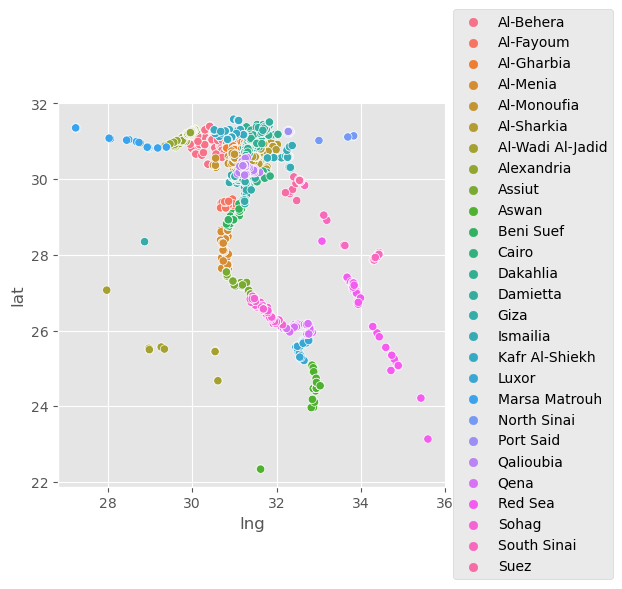

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x="lng", y="lat", hue="governate")
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
plt.show();

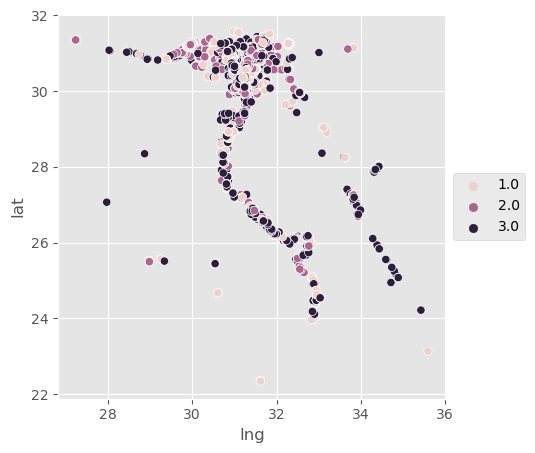

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x="lng", y="lat", hue="services")
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
plt.show();

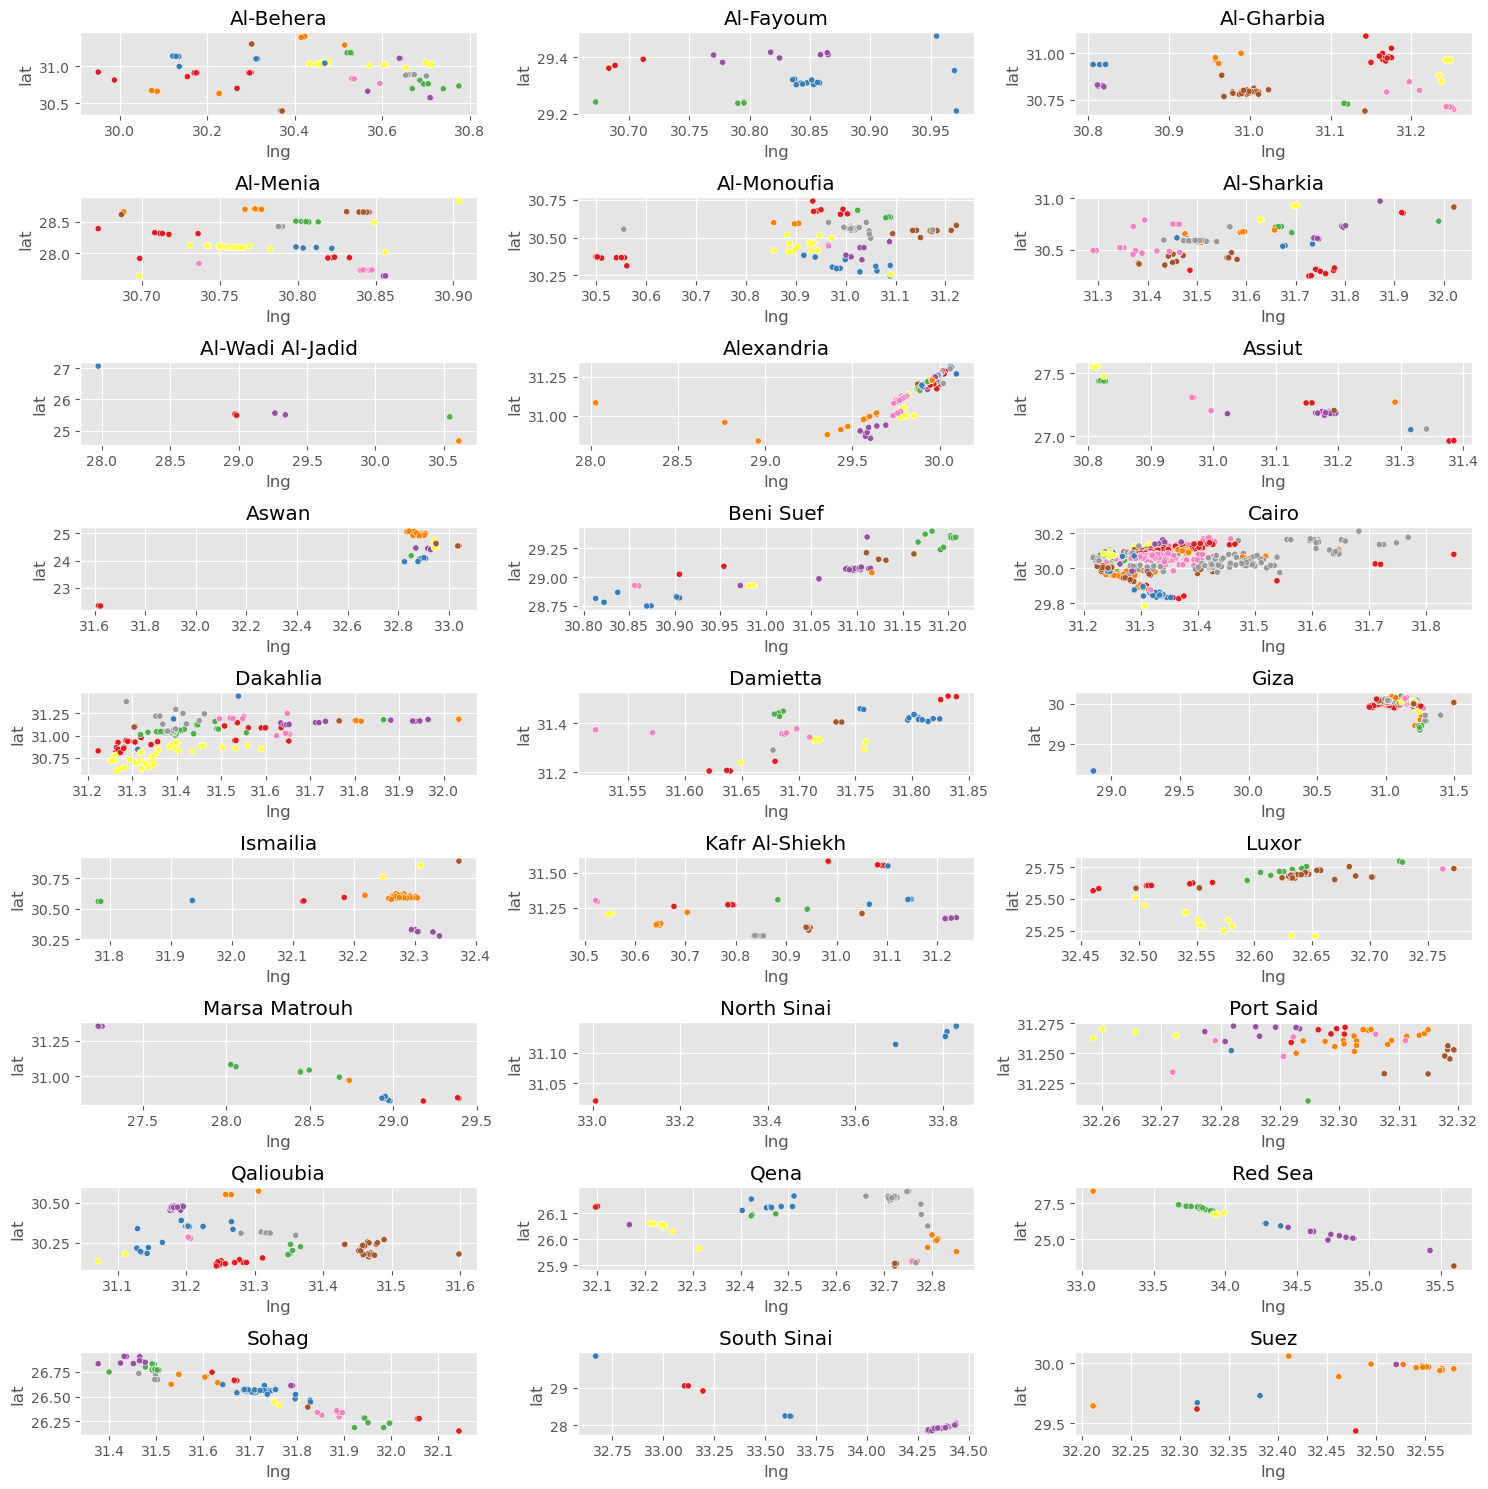

In [15]:
# Unique governorates in your DataFrame
unique_governorates = df['governate'].unique()
num_governorates = len(unique_governorates)

# Calculate the number of rows and columns for subplots
num_cols = 3  # You can adjust the number of columns as needed
num_rows = int(np.ceil(num_governorates / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if necessary
if num_rows > 1:
    axes = axes.flatten()

# Iterate through unique governorates and plot each one
for i, governorate in enumerate(unique_governorates):
    ax = axes[i]
    ax.set_title(governorate)
    sns.scatterplot(
        x=df[df['governate'] == governorate]['lng'],
        y=df[df['governate'] == governorate]['lat'],
        hue=df[df['governate'] == governorate]['area'],
        palette='Set1',
        legend=None,
        ax=ax,
        s=20,  # Adjust the size of the points as needed
    )

# Hide any remaining empty subplots
for i in range(num_governorates, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

# 04. The Models

In [16]:
df

,governate,area,lat,lng,services
0,Al-Behera,Abu Al Matamir,30.912211,30.170589,1.0
1,Al-Behera,Abu Al Matamir,30.910789,30.177019,3.0
2,Al-Behera,Abu Al Matamir,30.814059,29.988302,3.0
3,Al-Behera,Abu Al Matamir,30.915840,30.176447,1.0
4,Al-Behera,Abu Al Matamir,30.860114,30.154931,1.0
...,...,...,...,...,...
4374,Suez,Suez,29.967446,32.550833,3.0
4375,Suez,Suez,29.967901,32.553257,2.0
4376,Suez,Suez,29.975812,32.546986,2.0
4377,Suez,Suez,29.970363,32.551087,3.0


## 04.The Model

## 04.01: THe K-Mean with clustring by lat and lng (27 clusters)

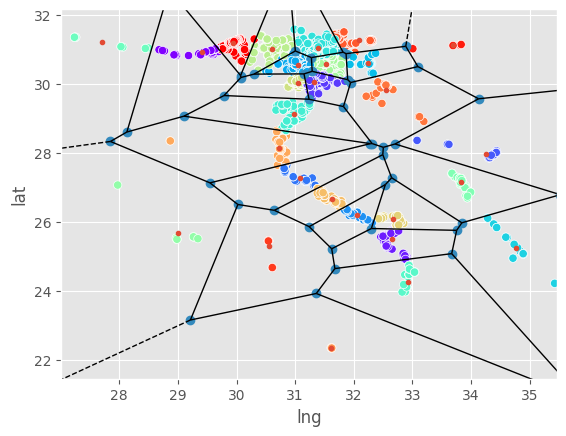

In [21]:
kmeans = KMeans(n_clusters=27)
kmeans.fit(df[['lng','lat', ]])
cluster = kmeans.predict(df[['lng','lat', ]])
sns.scatterplot(x=df['lng'],y=df['lat'],hue=cluster,palette='rainbow',legend=None)

centers=kmeans.cluster_centers_
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

## 04.02 K-mean and Grouping by Governate and cluster each Governate with lat and lng.

In [17]:
dict_governate = \
{
    'Cairo': 10,
    'Giza': 10,
    'Alexandria': 10,
    'Qalioubia': 8,
    'Al-Behera': 5,
    'Dakahlia': 6,
    'Port Said': 6,
    'Al-Monoufia': 5,
    'Damietta': 5,
    'Al-Menia': 4,
    'Al-Sharkia': 4,
    'Assiut': 4,
    'Beni Suef': 4,
    'Ismailia': 4,
    'Kafr Al-Shiekh': 4,
    'Luxor': 4,
    'Sohag': 4,
    'Suez': 4,
    'Al-Fayoum': 3,
    'Al-Gharbia': 3,
    'Qena': 3,
    'South Sinai': 3,
    'Marsa Matrouh': 2,
    'Al-Wadi Al-Jadid': 2,
    'Aswan': 2,
    'North Sinai': 2,
    'Red Sea': 2,
}

### 04.02.01: Cairo

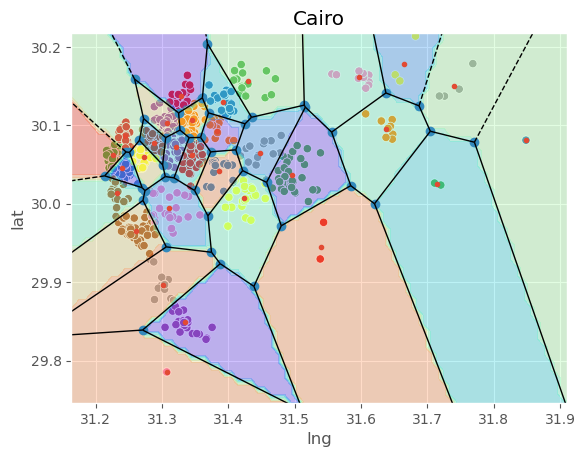

In [18]:
df_cairo = df.loc[df['governate'] == 'Cairo']
kmeans_cairo = KMeans(n_clusters=30)
kmeans_cairo.fit(df_cairo[['lng','lat']])
cluster_cairo = kmeans_cairo.predict(df_cairo[['lng','lat']])

plt.title("Cairo")
sns.scatterplot(x=df_cairo['lng'], y=df_cairo['lat'], hue=cluster_cairo,palette='Set1', legend=None)

x_min, x_max = df['lng'].min() - 1, df['lng'].max() + 1
y_min, y_max = df['lat'].min() - 1, df['lat'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = kmeans_cairo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.3)

centers_cairo=kmeans_cairo.cluster_centers_
vor = Voronoi(centers_cairo)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

In [38]:
# Add cluster labels to the DataFrame
df_cairo['cluster'] = kmeans_cairo.labels_

# Group the DataFrame by cluster labels and select one random point from each group
sample_df = df_cairo.groupby('cluster').apply(lambda x: x.sample(1))
sample_df

,,governate,area,lat,lng,services,cluster
cluster,,,,,,,
0,1521,Cairo,Ain Shams,30.130730,31.318725,1.0,0
1,1472,Cairo,Abdeen,30.051423,31.242430,3.0,1
2,2334,Cairo,New Cairo,30.057586,31.509220,3.0,2
3,2065,Cairo,Helwan,29.852085,31.338707,2.0,3
4,2429,Cairo,Sheraton,30.106552,31.375278,3.0,4
5,1628,Cairo,Al Shorouk City,30.156536,31.658516,3.0,5
6,1439,Cairo,Abbassia,30.072754,31.278841,1.0,6
7,2447,Cairo,Tora,29.968528,31.314474,3.0,7
8,2314,Cairo,New Cairo,30.076528,31.453108,3.0,8


In [19]:
centers_cairo

array([[31.32897059, 30.13721579],
       [31.24047641, 30.04606247],
       [31.49582572, 30.03606849],
       [31.33442948, 29.84975587],
       [31.38306133, 30.09254391],
       [31.66405337, 30.17819008],
       [31.28779765, 30.07691098],
       [31.31074274, 29.99407507],
       [31.448042  , 30.06522162],
       [31.345659  , 30.06150998],
       [31.39258707, 30.13018   ],
       [31.71397775, 30.0255309 ],
       [31.32087307, 30.07253866],
       [31.63697421, 30.09567085],
       [31.42396174, 30.00726803],
       [31.23168231, 30.01309135],
       [31.5967987 , 30.161563  ],
       [31.74008789, 30.14977497],
       [31.24468097, 30.08667534],
       [31.848537  , 30.081036  ],
       [31.43021284, 30.1568335 ],
       [31.30716958, 30.10354057],
       [31.34497044, 30.10713758],
       [31.27236377, 30.05957745],
       [31.26144893, 29.9647901 ],
       [31.30710467, 29.785736  ],
       [31.30092646, 29.89617257],
       [31.54019375, 29.9452222 ],
       [31.38658719,

In [24]:
df_cairo["cluster_cairo"] = cluster_cairo
df_cairo

,governate,area,lat,lng,services,cluster_cairo
1402,Cairo,15th of May City,29.828746,31.367421,3.0,11
1403,Cairo,15th of May City,29.842563,31.375574,1.0,11
1404,Cairo,15th of May City,29.827338,31.366390,3.0,11
1405,Cairo,15th of May City,29.833806,31.356309,3.0,11
1406,Cairo,15th of May City,29.903439,31.309506,3.0,4
...,...,...,...,...,...,...
2477,Cairo,Zamalek,30.041969,31.224798,1.0,1
2478,Cairo,Zamalek,30.050740,31.226001,2.0,1
2479,Cairo,Zamalek,30.057156,31.225345,3.0,28
2480,Cairo,Zamalek,30.047390,31.223963,2.0,1


In [40]:
df_cairo.to_csv('cluster_cairo.csv', index=False)

In [ ]:
df_cairo["area"].value_counts()

In [36]:
df_cairo.loc[df_cairo["area"] == [""], ["area", "lat", "lng"]]

,area,lat,lng
1408,Abbassia,30.072166,31.285565
1409,Abbassia,30.066169,31.279672
1410,Abbassia,30.071010,31.286451
1411,Abbassia,30.071681,31.275023
1412,Abbassia,30.071193,31.283585
...,...,...,...
2252,Nasr City,30.073239,31.300957
2280,Nasr City,30.060746,31.300799
2290,Nasr City,30.066060,31.298696
2292,Nasr City,30.057548,31.290880


In [ ]:
# cluster_0 = df_cairo.loc[df_cairo["cluster_cairo"] == 0, ["area", "lat", "lng"]].iloc[0: 70, ]
# cluster_0

In [ ]:
# coordinates = cluster_0[['lng', 'lat']].values
# names = cluster_0['area'].values

In [ ]:
# import routingpy as rp

In [ ]:
# key_api = "22971884-a597-4f70-b55b-930feb3bde02"

In [ ]:
# # api_key = # get a free key at https://www.graphhopper.com/
# api = rp.Graphhopper(api_key=key_api)
# matrix = api.matrix(locations=coordinates, profile='car')
# durations = np.matrix(matrix.durations)
# print(durations)

In [ ]:
# def symmetricize(m, high_int=None):

#     # if high_int not provided, make it equal to 10 times the max value:
#     if high_int is None:
#         high_int = round(10*m.max())

#     m_bar = m.copy()
#     np.fill_diagonal(m_bar, 0)
#     u = np.matrix(np.ones(m.shape) * high_int)
#     np.fill_diagonal(u, 0)
#     m_symm_top = np.concatenate((u, np.transpose(m_bar)), axis=1)
#     m_symm_bottom = np.concatenate((m_bar, u), axis=1)
#     m_symm = np.concatenate((m_symm_top, m_symm_bottom), axis=0)

#     return m_symm.astype(int) # Concorde requires integer weights

In [ ]:
# symmetricize(durations)

In [ ]:
# import sys
# import os
# py_file_location = "/content/pyconcorde/concorde"
# sys.path.append(os.path.abspath(py_file_location))

In [ ]:
# from pyconcorde.concorde.problem import Problem
# from pyconcorde.concorde.concorde import Concorde

# def solve_concorde(matrix):
#     problem = Problem.from_matrix(matrix)
#     solver = Concorde()
#     solution = solver.solve(problem)
#     print(f'Optimal tour: {solution.tour}')
#     return solution

In [ ]:
# durations_symm = symmetricize(durations)
# solution = solve_concorde(durations_symm)
# print(solution)

In [ ]:
# # pick alternate elements: these correspond to the originals
# tour = solution.tour[::2]

# # order the original coordinates and names
# coords_ordered = [coordinates[i].tolist() for i in tour]
# names_ordered = [names[i] for i in tour]

In [ ]:
# # add back in the first for a complete loop
# coords_ordered_return = coords_ordered + [coords_ordered[0]]

# # obtain complete driving directions for the ordered loop
# directions = api.directions(locations=coords_ordered_return, profile='car')

In [ ]:
# def generate_map(coordinates, names, directions):

#     # folium needs lat, long
#     coordinates = [(y, x) for (x, y) in coordinates]
#     route_points = [(y, x) for (x, y) in directions.geometry]
#     lat_centre = np.mean([x for (x, y) in coordinates])
#     lon_centre = np.mean([y for (x, y) in coordinates])
#     centre = lat_centre, lon_centre

#     m = folium.Map(location=centre, zoom_start=1, zoom_control=False)

#     # plot the route line
#     folium.PolyLine(route_points, color='red', weight=2).add_to(m)

#     # plot each point with a hover tooltip
#     for i, (point, name) in enumerate(zip(coordinates, names)):
#         folium.CircleMarker(location=point,
#                       tooltip=f'{i}: {name}',
#                       radius=3).add_to(m)

#     custom_tile_layer = folium.TileLayer(
#         tiles='http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png',
#         attr='CartoDB Positron',
#         name='Positron',
#         overlay=True,
#         control=True,
#         opacity=0.7  # Adjust opacity to control the level of greying out
#     )

#     custom_tile_layer.add_to(m)
#     folium.LayerControl().add_to(m)

#     sw = (np.min([x for (x, y) in coordinates]), np.min([y for (x, y) in coordinates]))
#     ne = (np.max([x for (x, y) in coordinates]), np.max([y for (x, y) in coordinates]))
#     m.fit_bounds([sw, ne])

#     return m

# generate_map(coords_ordered, names_ordered, directions).save('gb_cities.html')

### 04.02.02: Nasr_city_cairo

In [ ]:
data_cairo=df[df['governate']=='Cairo']
data_cairo

,governate,area,lat,lng,services
1402,Cairo,15th of May City,29.828746,31.367421,3.0
1403,Cairo,15th of May City,29.842563,31.375574,1.0
1404,Cairo,15th of May City,29.827338,31.366390,3.0
1405,Cairo,15th of May City,29.833806,31.356309,3.0
1406,Cairo,15th of May City,29.903439,31.309506,3.0
...,...,...,...,...,...
2477,Cairo,Zamalek,30.041969,31.224798,1.0
2478,Cairo,Zamalek,30.050740,31.226001,2.0
2479,Cairo,Zamalek,30.057156,31.225345,3.0
2480,Cairo,Zamalek,30.047390,31.223963,2.0


In [ ]:
nasr_city_data = data_cairo[data_cairo['area'] == 'Nasr City']
nasr_city_data

,governate,area,lat,lng,services
2123,Cairo,Nasr City,30.060628,31.323198,3.0
2124,Cairo,Nasr City,30.050569,31.356527,1.0
2125,Cairo,Nasr City,30.056007,31.346339,1.0
2126,Cairo,Nasr City,30.054456,31.311520,1.0
2127,Cairo,Nasr City,30.038474,31.341186,1.0
...,...,...,...,...,...
2289,Cairo,Nasr City,30.066072,31.323309,3.0
2290,Cairo,Nasr City,30.066060,31.298696,3.0
2291,Cairo,Nasr City,30.075947,31.320260,3.0
2292,Cairo,Nasr City,30.057548,31.290880,3.0


In [ ]:
nasr_city_cairo_test = nasr_city_data[['lat', 'lng']]
nasr_city_cairo_test

,lat,lng
2123,30.060628,31.323198
2124,30.050569,31.356527
2125,30.056007,31.346339
2126,30.054456,31.311520
2127,30.038474,31.341186
...,...,...
2289,30.066072,31.323309
2290,30.066060,31.298696
2291,30.075947,31.320260
2292,30.057548,31.290880


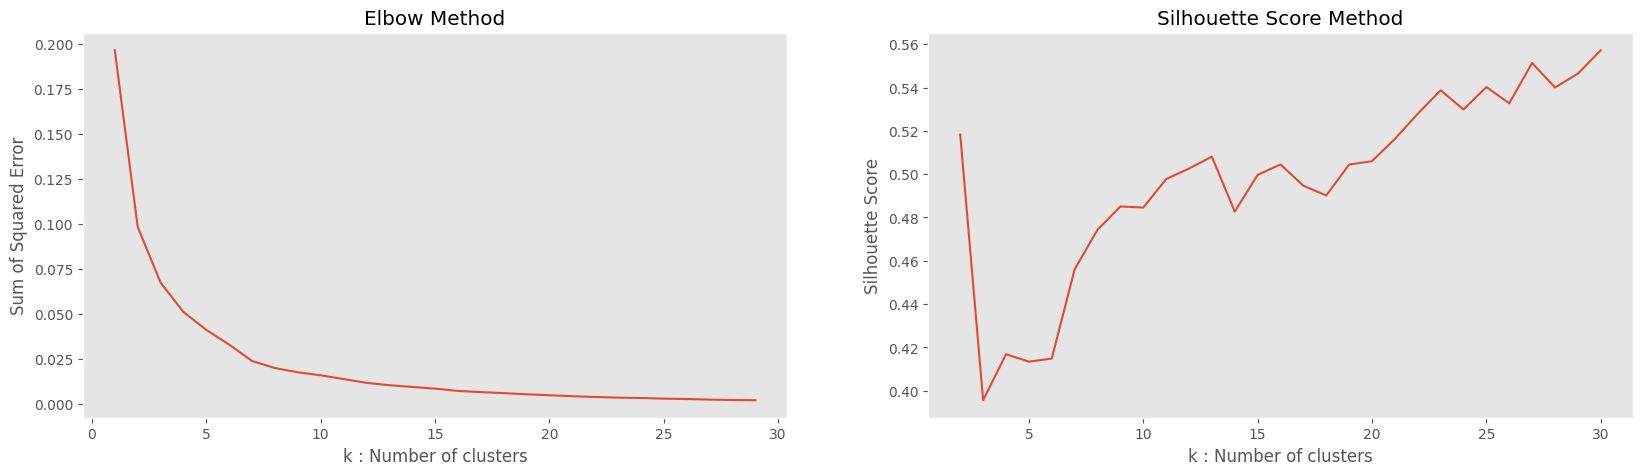

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
sil = []
kmax = 30

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Assuming nasr_city_cairo_test contains your data

# Elbow Method:
plt.subplot(1, 2, 1)
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(nasr_city_cairo_test)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method:
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(nasr_city_cairo_test)
    labels = kmeans.labels_
    sil.append(silhouette_score(nasr_city_cairo_test, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

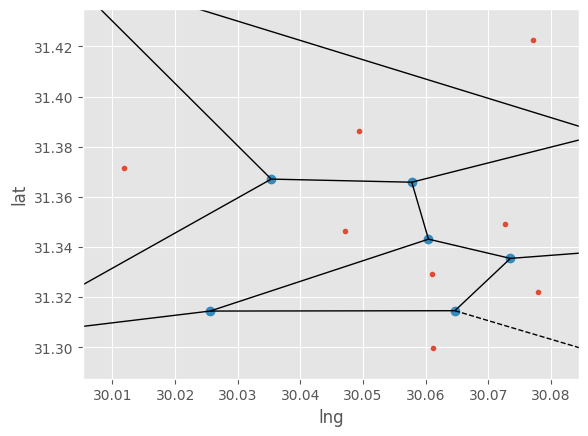

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
kmeans = KMeans(n_clusters=8,init='k-means++')
kmeans.fit(nasr_city_cairo_test)
cluster = kmeans.predict(nasr_city_cairo_test)
sns.scatterplot(x=nasr_city_data['lng'],y=nasr_city_data['lat'],hue=cluster,palette='rainbow',legend=False)

# x_min, x_max = df['lng'].min() - 1, df['lng'].max() + 1
# y_min, y_max = df['lat'].min() - 1, df['lat'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.3)

centers=kmeans.cluster_centers_
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Assuming Y is your DataFrame with 'lng' and 'lat' columns
KMeans = KMeans(n_clusters=11, init='k-means++')
KMeans.fit(nasr_city_cairo_test)
cluster_nasr_city = KMeans.predict(nasr_city_cairo_test)

centers_nasr_city=kmeans.cluster_centers_
# Access the cluster labels
cluster_labels = KMeans.labels_

# Assign cluster labels to your original DataFrame
KMeans_clustered = nasr_city_data.copy()
KMeans_clustered['Cluster'] = cluster_labels

In [ ]:
nasr_city_data["claster_nasr_city"] = cluster_nasr_city
nasr_city_data

,governate,area,lat,lng,services,claster_nasr_city
2123,Cairo,Nasr City,30.060628,31.323198,3.0,4
2124,Cairo,Nasr City,30.050569,31.356527,1.0,2
2125,Cairo,Nasr City,30.056007,31.346339,1.0,2
2126,Cairo,Nasr City,30.054456,31.311520,1.0,1
2127,Cairo,Nasr City,30.038474,31.341186,1.0,7
...,...,...,...,...,...,...
2289,Cairo,Nasr City,30.066072,31.323309,3.0,4
2290,Cairo,Nasr City,30.066060,31.298696,3.0,1
2291,Cairo,Nasr City,30.075947,31.320260,3.0,5
2292,Cairo,Nasr City,30.057548,31.290880,3.0,1


In [ ]:
nasr_city_data["claster_nasr_city"].value_counts().reset_index()

,index,claster_nasr_city
0,5,33
1,0,31
2,4,29
3,1,20
4,3,17
5,7,14
6,2,13
7,6,6
8,8,5
9,9,2


```
array(['Al-Behera', 'Al-Fayoum', 'Al-Gharbia', 'Al-Menia', 'Al-Monoufia',
       'Al-Sharkia', 'Al-Wadi Al-Jadid', 'Alexandria', 'Assiut', 'Aswan',
       'Beni Suef', 'Cairo', 'Dakahlia', 'Damietta', 'Giza', 'Ismailia',
       'Kafr Al-Shiekh', 'Luxor', 'Marsa Matrouh', 'North Sinai',
       'Port Said', 'Qalioubia', 'Qena', 'Red Sea', 'Sohag',
       'South Sinai', 'Suez'
```

In [ ]:
Giza = df[df["governate"] == "Giza"]
Giza["area"].value_counts().reset_index().head(10)

,index,area
0,6th of October City,106
1,Al Haram,56
2,El-Shiekh Zayed,55
3,Dokki,45
4,Mohandessin,38
5,Giza,29
6,Imbaba,27
7,Faisal,23
8,Smart Village,18
9,Hadieq Alahram,17


In [ ]:
El_Shiekh_Zayed = Giza[Giza["area"] == "6th of October City"]

In [ ]:
# !pip install routingpy
# !pip install googlemaps
# !git clone https://github.com/jvkersch/pyconcorde
# !pip install -e /content/pyconcorde/.

In [34]:
centroids = pd.DataFrame(centers_cairo, columns=["lat", "lng"]).reset_index()
centroids

,index,lat,lng
0,0,31.328971,30.137216
1,1,31.240476,30.046062
2,2,31.495826,30.036068
3,3,31.334429,29.849756
4,4,31.383061,30.092544
5,5,31.664053,30.178190
6,6,31.287798,30.076911
7,7,31.310743,29.994075
8,8,31.448042,30.065222
9,9,31.345659,30.061510


In [29]:
# !git clone https://github.com/jvkersch/pyconcorde 
# !pip install tsplib95

Defaulting to user installation because normal site-packages is not writeable
  Using cached tsplib95-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [39]:
sample_df

,,governate,area,lat,lng,services,cluster
cluster,,,,,,,
0,1521,Cairo,Ain Shams,30.130730,31.318725,1.0,0
1,1472,Cairo,Abdeen,30.051423,31.242430,3.0,1
2,2334,Cairo,New Cairo,30.057586,31.509220,3.0,2
3,2065,Cairo,Helwan,29.852085,31.338707,2.0,3
4,2429,Cairo,Sheraton,30.106552,31.375278,3.0,4
5,1628,Cairo,Al Shorouk City,30.156536,31.658516,3.0,5
6,1439,Cairo,Abbassia,30.072754,31.278841,1.0,6
7,2447,Cairo,Tora,29.968528,31.314474,3.0,7
8,2314,Cairo,New Cairo,30.076528,31.453108,3.0,8


In [42]:
i = 8
# cluster_nasr_city = nasr_city_data.loc[nasr_city_data["claster_nasr_city"] == i, ["area", "lat", "lng"]]

coordinates = sample_df[['lat', 'lng']].values
names = sample_df['area'].values

In [44]:
import routingpy as rp
import numpy as np
import folium

from pyconcorde.concorde.problem import Problem
from pyconcorde.concorde.concorde import Concorde

api_key = "08c65e4b-0f5d-43a5-a59c-5142bc013712"
api = rp.Graphhopper(api_key=api_key)
matrix = api.matrix(locations=coordinates, profile='car')
durations = np.matrix(matrix.durations)

def symmetricize(m, high_int=None):

    # if high_int not provided, make it equal to 10 times the max value:
    if high_int is None:
        high_int = round(10*m.max())

    m_bar = m.copy()
    np.fill_diagonal(m_bar, 0)
    u = np.matrix(np.ones(m.shape) * high_int)
    np.fill_diagonal(u, 0)
    m_symm_top = np.concatenate((u, np.transpose(m_bar)), axis=1)
    m_symm_bottom = np.concatenate((m_bar, u), axis=1)
    m_symm = np.concatenate((m_symm_top, m_symm_bottom), axis=0)

    return m_symm.astype(int) # Concorde requires integer weights


def solve_concorde(matrix):
    problem = Problem.from_matrix(matrix)
    solver = Concorde()
    solution = solver.solve(problem)
    return solution

durations_symm = symmetricize(durations)
solution = solve_concorde(durations_symm)

# pick alternate elements: these correspond to the originals
tour = solution.tour[::2]

# order the original coordinates and names
coords_ordered = [coordinates[i].tolist() for i in tour]
names_ordered = [names[i] for i in tour]

# add back in the first for a complete loop
coords_ordered_return = coords_ordered + [coords_ordered[0]]

# obtain complete driving directions for the ordered loop
directions = api.directions(locations=coords_ordered_return, profile='car')

def generate_map(coordinates, names, directions):

    # folium needs lat, long
    coordinates = [(y, x) for (x, y) in coordinates]
    route_points = [(y, x) for (x, y) in directions.geometry]
    lat_centre = np.mean([x for (x, y) in coordinates])
    lon_centre = np.mean([y for (x, y) in coordinates])
    centre = lat_centre, lon_centre

    m = folium.Map(location=centre, zoom_start=1, zoom_control=False)

    # plot the route line
    folium.PolyLine(route_points, color='red', weight=2).add_to(m)

    # plot each point with a hover tooltip
    for i, (point, name) in enumerate(zip(coordinates, names)):
        folium.CircleMarker(location=point,
                      tooltip=f'{i}: {name}',
                      radius=3).add_to(m)

    custom_tile_layer = folium.TileLayer(
        tiles='http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png',
        attr='CartoDB Positron',
        name='Positron',
        overlay=True,
        control=True,
        opacity=0.7  # Adjust opacity to control the level of greying out
    )

    custom_tile_layer.add_to(m)
    folium.LayerControl().add_to(m)

    sw = (np.min([x for (x, y) in coordinates]), np.min([y for (x, y) in coordinates]))
    ne = (np.max([x for (x, y) in coordinates]), np.max([y for (x, y) in coordinates]))
    m.fit_bounds([sw, ne])

    return m

generate_map(coords_ordered, names_ordered, directions).save(f'centers_cluster.html')

RouterApiError: 400 ({"message":"Cannot find from_points: 0, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 25, 26, 27, 28","hints":[{"details":"java.lang.IllegalArgumentException","message":"Cannot find from_points: 0, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 25, 26, 27, 28"},{"details":"java.lang.IllegalArgumentException","message":"Cannot find to_points: 0, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 25, 26, 27, 28"}],"status":"finished"})

In [ ]:
# import googlemaps
# import numpy as np
# from pyconcorde.concorde.problem import Problem
# from pyconcorde.concorde.concorde import Concorde

# api_key = 'Your-API-Key'  # replace with your Google Maps API Key
# gmaps = googlemaps.Client(key=api_key)

# # Let's assume your dataset is a list of tuples where each tuple contains the latitude and longitude of a location
# coordinates = [(37.7749, -122.4194), (34.0522, -118.2437), (51.5074, -0.1278), (48.8566, 2.3522)]

# # Calculate the distance matrix
# matrix = []
# for i in range(len(coordinates)):
#     row = []
#     for j in range(len(coordinates)):
#         if i == j:
#             row.append(0)
#         else:
#             # Get the driving distance between the two locations
#             result = gmaps.distance_matrix(origins=coordinates[i], destinations=coordinates[j], mode='driving')
#             # Extract the distance in meters from the result and convert it to kilometers
#             distance = result['rows'][0]['elements'][0]['distance']['value'] / 1000
#             row.append(distance)
#     matrix.append(row)

# # Convert the matrix to a numpy array
# durations = np.array(matrix)

# # Symmetricize the matrix
# high_int = round(10 * durations.max())
# durations_symm = np.concatenate((np.ones(durations.shape) * high_int - np.transpose(durations), durations), axis=1)
# durations_symm = np.concatenate((np.concatenate((np.ones(durations.shape) * high_int, durations), axis=1), durations_symm), axis=0)

# # Solve the problem using Concorde
# problem = Problem.from_matrix(durations_symm.astype(int))
# solver = Concorde()
# solution = solver.solve(problem)

# # Get the ordered coordinates
# tour = solution.tour[::2]
# coords_ordered = [coordinates[i] for i in tour]

# print(coords_ordered)